#  세인트루이스 연방은행 경제 데이터

In [3]:
import requests
import json
import pandas as pd
import re 
from bs4 import BeautifulSoup
import pandas_datareader as pdr

In [4]:
rt = pdr.DataReader("W976RC1Q027SBEA", 'fred', '1950-01-01', '2019-12-31')

In [5]:
rt

,W976RC1Q027SBEA
DATE,
1955-01-01,-0.004
1955-04-01,-0.008
1955-07-01,-0.008
1955-10-01,-0.012
1956-01-01,-0.016
...,...
2018-07-01,13.765
2018-10-01,32.230
2019-01-01,-0.554


## DataReader에 읽을 series를 가져오는것을 만든다

In [6]:
r = requests.get("https://fred.stlouisfed.org/tags/series?et=&ob=pv&pageID=1&t=")

In [7]:
bs = BeautifulSoup(r.text, 'html.parser')

In [9]:
bs.find_all("a", class_ = 'series-title pager-series-title-gtm')

[<a class="series-title pager-series-title-gtm" href="/series/T10Y2Y" style="font-size:1.2em">10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity</a>,
 <a class="series-title pager-series-title-gtm" href="/series/GDPC1" style="font-size:1.2em">Real Gross Domestic Product</a>,
 <a class="series-title pager-series-title-gtm" href="/series/FEDFUNDS" style="font-size:1.2em">Effective Federal Funds Rate</a>,
 <a class="series-title pager-series-title-gtm" href="/series/DGS10" style="font-size:1.2em">10-Year Treasury Constant Maturity Rate</a>,
 <a class="series-title pager-series-title-gtm" href="/series/CPIAUCSL" style="font-size:1.2em">Consumer Price Index for All Urban Consumers: All Items in U.S. City Average</a>,
 <a class="series-title pager-series-title-gtm" href="/series/T10Y3M" style="font-size:1.2em">10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity</a>,
 <a class="series-title pager-series-title-gtm" href="/series/UNRATE" style="fo

In [15]:
data = bs.find_all("a", class_ = 'series-title pager-series-title-gtm')

In [16]:
type(data)

bs4.element.ResultSet

In [18]:
data

[<a class="series-title pager-series-title-gtm" href="/series/T10Y2Y" style="font-size:1.2em">10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity</a>,
 <a class="series-title pager-series-title-gtm" href="/series/GDPC1" style="font-size:1.2em">Real Gross Domestic Product</a>,
 <a class="series-title pager-series-title-gtm" href="/series/FEDFUNDS" style="font-size:1.2em">Effective Federal Funds Rate</a>,
 <a class="series-title pager-series-title-gtm" href="/series/DGS10" style="font-size:1.2em">10-Year Treasury Constant Maturity Rate</a>,
 <a class="series-title pager-series-title-gtm" href="/series/CPIAUCSL" style="font-size:1.2em">Consumer Price Index for All Urban Consumers: All Items in U.S. City Average</a>,
 <a class="series-title pager-series-title-gtm" href="/series/T10Y3M" style="font-size:1.2em">10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity</a>,
 <a class="series-title pager-series-title-gtm" href="/series/UNRATE" style="fo

In [23]:
for row in data:
    print(row.text.strip(), '=======',row['href'].split('/')[2])

10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity ======= T10Y2Y
Real Gross Domestic Product ======= GDPC1
Effective Federal Funds Rate ======= FEDFUNDS
10-Year Treasury Constant Maturity Rate ======= DGS10
Consumer Price Index for All Urban Consumers: All Items in U.S. City Average ======= CPIAUCSL
10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity ======= T10Y3M
Unemployment Rate ======= UNRATE
Gross Domestic Product ======= GDP
ICE BofAML US High Yield Master II Option-Adjusted Spread ======= BAMLH0A0HYM2
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level ======= WALCL
Real Median Household Income in the United States ======= MEHOINUSA672N
S&P/Case-Shiller U.S. National Home Price Index ======= CSUSHPINSA
M2 Money Stock ======= M2
3-Month London Interbank Offered Rate (LIBOR), based on U.S. Dollar ======= USD3MTD156N
30-Year Fixed Rate Mortgage Average in the United States ======= MORTGAGE30US


In [24]:
last = int(re.search('[0-9]+', bs.find("a", {'title': 'last page'}).text).group())

In [26]:
series = []
for idx in range(1, last + 1):
    r= requests.get("https://fred.stlouisfed.org/tags/series?et=&ob=pv&pageID={}&t=".format(idx))
    bs = BeautifulSoup(r.text, 'lxml')
    for content in bs.find_all("a", class_ = 'series-title pager-series-title-gtm'):
        print(content.text.strip(),'----',content['href'].split('/')[2])
        series.append([content.text.strip(), content['href'].split('/')[2]])

10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity ---- T10Y2Y
Real Gross Domestic Product ---- GDPC1
Effective Federal Funds Rate ---- FEDFUNDS
10-Year Treasury Constant Maturity Rate ---- DGS10
Consumer Price Index for All Urban Consumers: All Items in U.S. City Average ---- CPIAUCSL
10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity ---- T10Y3M
Unemployment Rate ---- UNRATE
Gross Domestic Product ---- GDP
ICE BofAML US High Yield Master II Option-Adjusted Spread ---- BAMLH0A0HYM2
Assets: Total Assets: Total Assets (Less Eliminations From Consolidation): Wednesday Level ---- WALCL
Real Median Household Income in the United States ---- MEHOINUSA672N
S&P/Case-Shiller U.S. National Home Price Index ---- CSUSHPINSA
M2 Money Stock ---- M2
3-Month London Interbank Offered Rate (LIBOR), based on U.S. Dollar ---- USD3MTD156N
30-Year Fixed Rate Mortgage Average in the United States ---- MORTGAGE30US
All Employees, Total Nonfarm ---- PAYEMS
Indu

S&P/Case-Shiller CA-San Francisco Home Price Index ---- SFXRSA
20-Year Treasury Constant Maturity Rate ---- DGS20
10-Year High Quality Market (HQM) Corporate Bond Spot Rate ---- HQMCB10YR
Wilshire 5000 Total Market Full Cap Index ---- WILL5000INDFC
Unemployment Level ---- UNEMPLOY
ICE BofAML US High Yield B Effective Yield ---- BAMLH0A2HYBEY
Trade Balance: Goods and Services, Balance of Payments Basis ---- BOPGSTB
1-Month Treasury Constant Maturity Rate ---- DGS1MO
Light Weight Vehicle Sales: Autos and Light Trucks ---- ALTSALES
M3 for the United States ---- MABMM301USM189S
Chicago Fed National Financial Conditions Index ---- NFCI
Employment-Population Ratio ---- EMRATIO
MZM Money Stock ---- MZM
Total Unemployed, Plus All Marginally Attached Workers Plus Total Employed Part Time for Economic Reasons, as a Percent of All Civilian Labor Force Plus All Marginally Attached Workers ---- U6RATE
Gold Fixing Price 3:00 P.M. (London time) in London Bullion Market, based in U.S. Dollars ---- GOL

Real Government Consumption Expenditures and Gross Investment ---- A822RO1Q156NBEA
Commercial Real Estate Prices for United States ---- COMREPUSQ159N
Median Sales Price for New Houses Sold in the United States ---- MSPNHSUS
Total Savings Deposits at all Depository Institutions ---- SAVINGS
Global price of Brent Crude ---- POILBREUSDM
Moving 12-Month Total Vehicle Miles Traveled ---- M12MTVUSM227NFWA
Unemployment Rate: Aged 15-64: All Persons for the United States ---- LRUN64TTUSQ156S
Bank Prime Loan Rate Changes: Historical Dates of Changes and Rates ---- PRIME
Global Price Index of All Commodities ---- PALLFNFINDEXQ
Finance Rate on Consumer Installment Loans at Commercial Banks, New Autos 48 Month Loan ---- TERMCBAUTO48NS
Mortgage Debt Outstanding, All holders ---- MDOAH
Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Japan ---- IRLTLT01JPM156N
Current Price Gross Domestic Product in China ---- CHNGDPNQDSMEI
Wilshire 5000 Full Cap Price Index ---- WILL5000PRF

Motor Vehicle Retail Sales: Domestic Autos ---- DAUTOSAAR
S&P/Case-Shiller CO-Denver Home Price Index ---- DNXRSA
Real-time Sahm Rule Recession Indicator ---- SAHMREALTIME
State Minimum Wage Rate for Massachusetts ---- STTMINWGMA
M2 for United States ---- MYAGM2USM052N
Gross Domestic Product (Euro/ECU series) for Euro Area (19 Countries) ---- EUNNGDP
S&P/Case-Shiller NV-Las Vegas Home Price Index ---- LVXRNSA
20-Year High Quality Market (HQM) Corporate Bond Spot Rate ---- HQMCB20YR
Moody's Seasoned Baa Corporate Bond Minus Federal Funds Rate ---- BAAFFM
Private Residential Fixed Investment ---- PRFI
Total Factor Productivity at Constant National Prices for United States ---- RTFPNAUSA632NRUG
Nominal Potential Gross Domestic Product ---- NGDPPOT
Consumer Loans, All Commercial Banks ---- CONSUMER
CBOE S&P 500 3-Month Volatility Index ---- VXVCLS
Gross domestic product per capita ---- A939RC0A052NBEA
Exports of Goods and Services ---- EXPGS
Unemployment Rate in California ---- CAUR
3-Mont

Federal government current expenditures: Interest payments ---- NA000308Q
All Employees, Government ---- USGOVT
Average Hourly Earnings of Production and Nonsupervisory Employees: Manufacturing ---- CES3000000008
Total Construction Spending: Residential ---- TLRESCONS
Inflation, consumer prices for Japan ---- FPCPITOTLZGJPN
Corporate business: Profits before tax (without IVA and CCAdj) ---- A446RC1Q027SBEA
San Francisco Tech Pulse ---- SFTPINDM114SFRBSF
Inflation, consumer prices for Argentina ---- FPCPITOTLZGARG
Total Revolving Credit Owned and Securitized, Outstanding ---- REVOLSL
Hourly Earnings: Manufacturing for the United States ---- LCEAMN01USM659S
Gross Domestic Product for Germany ---- CPMNACSCAB1GQDE
Total Gross Domestic Product for Florida ---- FLNGSP
Households and nonprofit organizations; home mortgages; liability, Level ---- HHMSDODNS
Gross private domestic investment: Domestic business ---- W987RC1Q027SBEA
U.S. Imports of Goods by Customs Basis from China ---- IMPCH
Indu

In [28]:
pd.DataFrame(series, columns=['title', 'series'])

,title,series
0,10-Year Treasury Constant Maturity Minus 2-Yea...,T10Y2Y
1,Real Gross Domestic Product,GDPC1
2,Effective Federal Funds Rate,FEDFUNDS
3,10-Year Treasury Constant Maturity Rate,DGS10
4,Consumer Price Index for All Urban Consumers: ...,CPIAUCSL
...,...,...
658,Nonfinancial corporate business: Profits befor...,A464RC1Q027SBEA
659,Delinquency Rate on Loans to Finance Agricultu...,DRFAPGACBN
660,Real Gross Private Domestic Investment: Fixed ...,Y033RX1Q020SBEA
661,Share of Total Net Worth Held by the Top 1% (9...,WFRBST01134


In [29]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


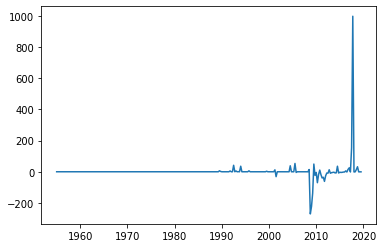

In [35]:
plt.plot(rt)

In [34]:
rt.info

<bound method DataFrame.info of             W976RC1Q027SBEA
DATE                       
1955-01-01           -0.004
1955-04-01           -0.008
1955-07-01           -0.008
1955-10-01           -0.012
1956-01-01           -0.016
...                     ...
2018-07-01           13.765
2018-10-01           32.230
2019-01-01           -0.554
2019-04-01           -0.554
2019-07-01           -0.517

[259 rows x 1 columns]>